In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
import pandas as pd
df = pd.read_csv(r"C:\Users\aagra\Desktop\Online shopper\data\raw\online_shoppers_intention.csv")
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True)
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [42]:

df['VisitorType'] = LabelEncoder().fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,2,1,0


In [43]:
num_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,2,1,0


In [44]:
df.drop(['OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis=1, inplace=True)
df.head()   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,2,1,0


In [45]:
df['TotalPages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
df['TotalDuration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['PagesPerSecond'] = df['TotalPages'] / (df['TotalDuration'] + 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue,TotalPages,TotalDuration,PagesPerSecond
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,2,0,0,1,0.000000,1.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,0,0,2,64.000000,0.030769
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,2,0,0,1,0.000000,1.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,0,0,2,2.666667,0.545455
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,2,1,0,10,627.500000,0.015911


In [46]:
df['EngagementScore'] = (1 - df['BounceRates']) * df['TotalDuration']
df['PageValuePerPage'] = df['PageValues'] / (df['TotalPages'] + 1)
df['ProductFocus'] = df['ProductRelated'] / (df['TotalPages'] + 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue,TotalPages,TotalDuration,PagesPerSecond,EngagementScore,PageValuePerPage,ProductFocus
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,2,0,0,1,0.000000,1.000000,0.000000,0.0,0.500000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,0,0,2,64.000000,0.030769,64.000000,0.0,0.666667
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,2,0,0,1,0.000000,1.000000,0.000000,0.0,0.500000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,0,0,2,2.666667,0.545455,2.533333,0.0,0.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,2,1,0,10,627.500000,0.015911,614.950000,0.0,0.909091


In [47]:
df['HighBounce'] = (df['BounceRates'] > 0.05).astype(int)
df['HighExit'] = (df['ExitRates'] > 0.05).astype(int)
df['ActiveBuyer'] = (df['ProductRelated_Duration'] > 300).astype(int)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,TotalPages,TotalDuration,PagesPerSecond,EngagementScore,PageValuePerPage,ProductFocus,HighBounce,HighExit,ActiveBuyer
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,1,0.000000,1.000000,0.000000,0.0,0.500000,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,2,64.000000,0.030769,64.000000,0.0,0.666667,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,1,0.000000,1.000000,0.000000,0.0,0.500000,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,2,2.666667,0.545455,2.533333,0.0,0.666667,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,10,627.500000,0.015911,614.950000,0.0,0.909091,0,0,1


In [48]:
''' # Map month names to numeric values
month_map = {
    'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
    'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12
}

# Encode Month as numeric only if it's not already numeric
if df['Month'].dtype == object:
    df['Month'] = df['Month'].map(month_map)
    print(df[['Month']].head())
else:
    print("Month column already numeric. Sample values:")
    print(df['Month'].head())'''
df = pd.get_dummies(df, columns=['Month'], prefix='Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  VisitorType              12205 non-null  int64  
 11  Weekend                  12205 non-null  int64  
 12  Revenue                  12205 non-null  int64  
 13  TotalPages               12205 non-null  int64  
 14  TotalDuration            12

In [49]:
df['ReturningVisitorFlag'] = (df['VisitorType'] == 'Returning_Visitor').astype(int)
df['Weekend'] = df['Weekend'].astype(int)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  VisitorType              12205 non-null  int64  
 11  Weekend                  12205 non-null  int64  
 12  Revenue                  12205 non-null  int64  
 13  TotalPages               12205 non-null  int64  
 14  TotalDuration            12

In [50]:
df['ProductEngagement'] = df['ProductRelated_Duration'] * df['PageValues']
df['InfoEfficiency'] = df['Informational_Duration'] / (df['Informational'] + 1)
df['AdminEfficiency'] = df['Administrative_Duration'] / (df['Administrative'] + 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,ReturningVisitorFlag,ProductEngagement,InfoEfficiency,AdminEfficiency
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0


In [51]:
# 1️⃣3️⃣ Clean before scaling
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 1️⃣4️⃣ Remove zero-variance numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Revenue' in num_cols:
    num_cols.remove('Revenue')
exclude_cols = [
    'Revenue',               # target variable
    'VisitorType',           # categorical
    'Weekend',               # binary flag
    'HighBounce',            # binary flag
    'HighExit',              # binary flag
    'ActiveBuyer',           # binary flag
    'ReturningVisitorFlag',  # binary flag
    'Month'                  # numeric but categorical (1-12)
]
exclude_cols += [col for col in df.columns if col.startswith('Month_')]
num_cols = [col for col in num_cols if col not in exclude_cols]

# 1️⃣5️⃣ Standardize numeric columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Data Preprocessing Completed Successfully!")
df.head()


✅ Data Preprocessing Completed Successfully!


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,ReturningVisitorFlag,ProductEngagement,InfoEfficiency,AdminEfficiency
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.018805,0.00,0.50,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000784,0.25,0.70,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.184375,0.10,0.25,0.0,0.0,...,False,False,False,False,False,False,0,0.0,0.0,0.0


In [52]:
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()
df.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  VisitorType              12205 non-null  int64  
 11  Weekend                  12205 non-null  int64  
 12  Revenue                  12205 non-null  int64  
 13  TotalPages               12205 non-null  float64
 14  TotalDuration            12

np.int64(476)

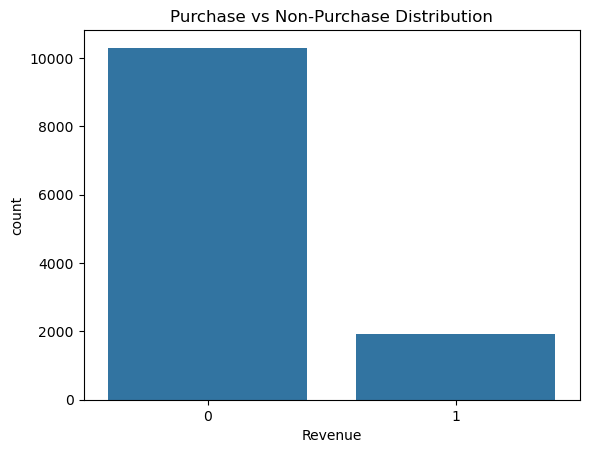

Revenue
0    0.843671
1    0.156329
Name: proportion, dtype: float64

In [53]:
sns.countplot(x='Revenue', data=df)
plt.title('Purchase vs Non-Purchase Distribution')
plt.show()

df['Revenue'].value_counts(normalize=True)



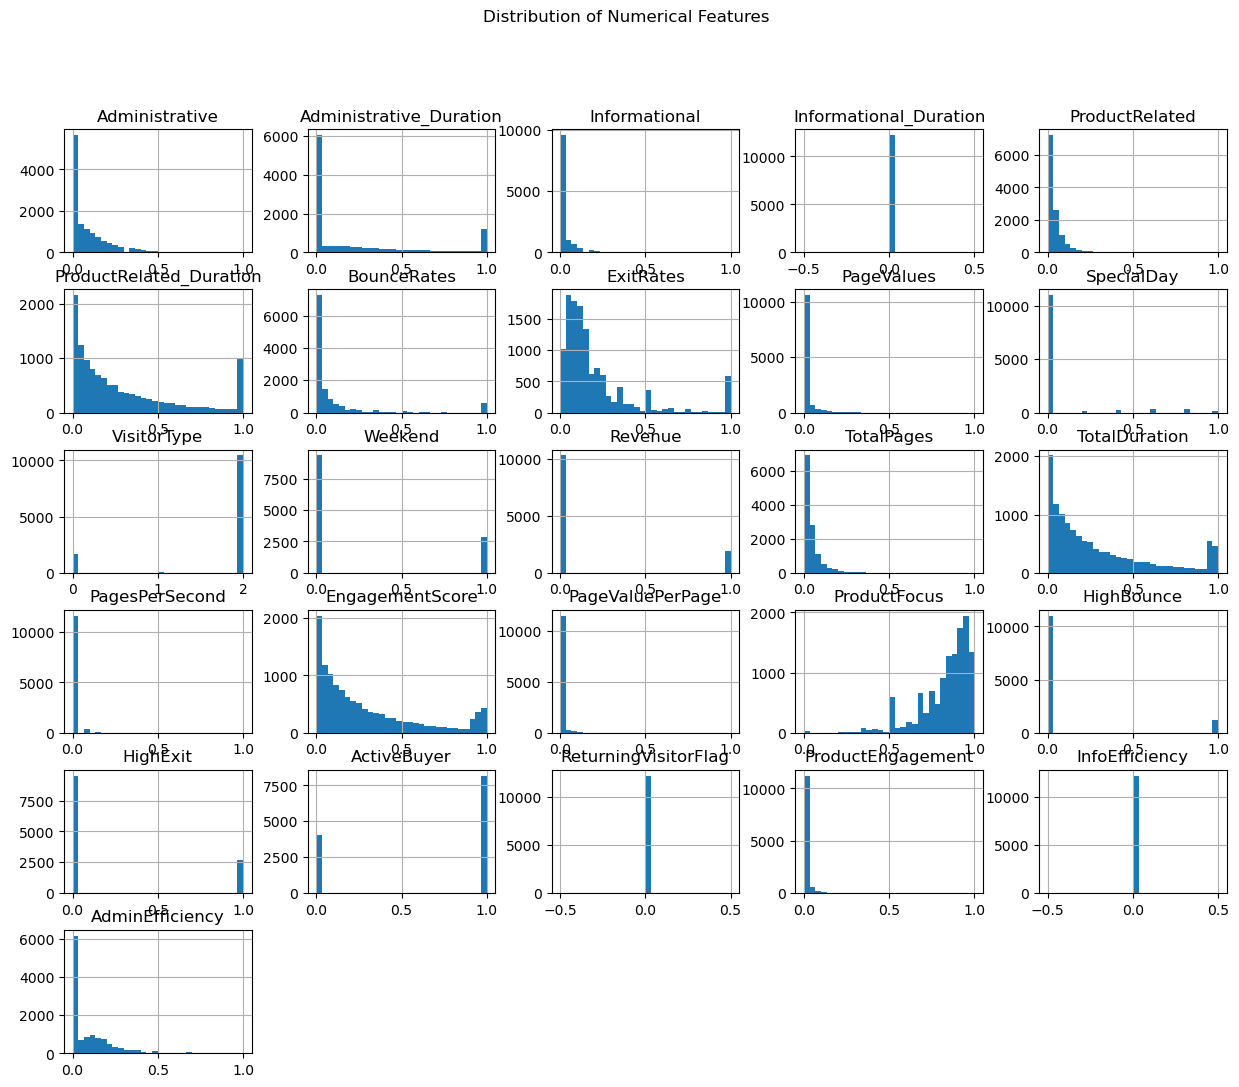

In [54]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [55]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  VisitorType              12205 non-null  int64  
 11  Weekend                  12205 non-null  int64  
 12  Revenue                  12205 non-null  int64  
 13  TotalPages               12205 non-null  float64
 14  TotalDuration            12

In [56]:
# Save the cleaned and processed dataset to a new CSV file
df.to_csv("cleaned_ecommerce_shopper_data.csv", index=False)

print("✅ Processed dataset saved successfully as 'cleaned_ecommerce_shopper_data.csv'")


✅ Processed dataset saved successfully as 'cleaned_ecommerce_shopper_data.csv'
